# **Hands-on Introduction to Machine Learning**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230706133033/An-introduction-to-Machine-Learning-01.webp" width="60%" />


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/5-feat-introduction-to-ml-practical/practicals/Intro_ML_English_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> [Change colab link to point to prac.]

© Deep Learning Indaba 2023. Apache License 2.0.

**Authors:**

**Reviewers:**

**Introduction:**

In this tutorial, we explore the fundamentals of machine learning. Machine Learning allows computers to learn from data and make predictions or decisions without explicit programming. In this tutorial, we will learn how to build and train a machine learning model.

In the first section, we will broadly introduce machine learning. In section 2 and section 3, we will learn how to solve two familiar types of machine learnng problems namely: regression and classification.

**Topics:**

Content: Supervised learning, Neural Networks, Numerical Computing

Level: <font color='grey'>`Beginner`


**Aims/Learning Objectives:**

- Understand the basics of Machine learning.
- Training a machine learning model for a Regession task.
- Training a machine learning model for a classification task.

**Prerequisites:**

- Familiarity with [Numpy](https://numpy.org/doc/stable/user/quickstart.html).

**Outline:**

>[Hands-on Introduction to Machine Learning](#scrollTo=m2s4kN_QPQVe)

>>[What is machine learning](#scrollTo=FVw9C8GugkAj)

>>>[1.1 Examples of Machine learning Applications - Beginner](#scrollTo=fecyoo1o9RP7)

>>>[1.2 Types of machine learning problems - Beginner](#scrollTo=v2k8dcYR9Hvb)

>>>[1.3 Examples of popular machine learning algorithms - Beginner](#scrollTo=AcqMiu7yciJk)

>>[Regression using JAX](#scrollTo=e9NW58_3hAg2)

>>>[2.1 Linear regression - Beginner](#scrollTo=bA_2coZvhAg3)

>>>>[Model representation - Beginner](#scrollTo=kRQihf7uLExw)

>>>>[Cost function and optimization - Beginner](#scrollTo=hNJgESq_LP4R)

>>>>[Training the model using Jax - Beginner](#scrollTo=q9dQh9DdLYPE)

>>>[2.2 Non linear regression and neural networks  - Intermediate](#scrollTo=BKtMEnRkhAg9)

>>>>[Model representation - Beginner](#scrollTo=XStsgHB2MarI)

>>>>[Activation functions - Beginner](#scrollTo=fkpytbBzMvMj)

>>>>[Building a simple neural network model with Jax - Beginner](#scrollTo=3Wrxt2orM7sk)

>>[Classification using Jax](#scrollTo=fbTsk0MdhAhC)

>>>[3.1 Logistic regression - Beginner](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits and sigmoid activation function - Beginner](#scrollTo=SE1L3rmaO4UP)

>>>>[Building a simple neural network for classification - Beginner](#scrollTo=EcXXE56hPOhK)

>>>>[Training the model - Beginner](#scrollTo=GcSvlekHPWxW)

>>>>[Evaluating the model - Beginner](#scrollTo=sGPvmGWkP1fT)

>>>[3.4 Subsection - Homework](#scrollTo=SdNPg0pnhAhG)

>>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>>[Feedback](#scrollTo=o1ndpYE50BpG)



**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | It is my first time being introduced to this work. |
`Intermediate`  | I have done some basic courses/intros on this topic. |
`Advanced`      | I work in this area/topic daily. |

In [ ]:
# @title **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "beginner" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="Introduction -> 1.1 Subsection -> 2.1 Subsection -> Conclusion -> Feedback"
elif experience == "intermediate":
  sections_to_follow="Introduction -> 1.2 Subsection -> 2.2 Subsection -> Conclusion -> Feedback"
elif experience == "advanced":
  sections_to_follow="Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback"

print(f"Based on your experience, it is advised you follow these -- {sections_to_follow} sections. Note this is just a guideline.")

In [1]:
! pip install dm-haiku --quiet

## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import haiku as hk
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
# @title Helper Functions. (Run Cell)

## **What is machine learning**
In the last two decades, the field of artificial intelligence (AI) has transcended from being mainly used by computer scientists, mathematicians, and physicists to being applied in nearly every domain. It is currently used by almost every literate human being in one form or another. Applications like YouTube and Netflix, which we use on a daily basis, utilize AI to suggest content that we may like.
<center>
<img src="https://s3.ap-southeast-1.amazonaws.com/files-scs-prod/public%2Fimages%2F1605842918803-AI+vs+ML+vs+DL.png" width="60%" />
</center>

AI is the ability to develop smart systems. Machine learning is subset of AI techniques that learns from data using statiscal modelling techniques. Deep Learning is a subset of machine learning model that uses artificail neural network functions for modelling.

### 1.1 Examples of Machine learning Applications - <font color='blue'>`Beginner`</font>

Below is a list of some popular machine learning applications.

Image Classification, Object Detection, Sentiment Analysis, Speech Recognition, Recommendation Systems, Fraud Detection, Credit Scoring, Healthcare Diagnostics, Drug Discovery, Autonomous Vehicles, Face Recognition, Robotics and Automation, Gaming, Chatbots and Conversational AI, Climate Change Modeling, Clustering, and Data Compression.

### 1.2 Types of machine learning problems - <font color='blue'>`Beginner`</font>

Machine learning is based on learning from data. When formulating a machine learning problem, the first question we need to ask ourselves is what type of learning task do we have? Broadly speaking, machine learning tasks can be classified into three categories.

Supervised Learning: In supervised learning, the algorithm is provided with a labeled dataset, where each input data point is associated with the correct output (label). The goal is to learn a mapping from inputs to outputs based on the training data so that the model can make accurate predictions on new, unseen data.

Unsupervised Learning: In unsupervised learning, the algorithm is given an unlabeled dataset, and the goal is to find patterns, structures, or relationships within the data without explicit guidance. The algorithm tries to group similar data points or reduce the dimensionality of the data to reveal underlying structures.

Reinforcement Learning: In reinforcement learning, the algorithm learns to make decisions through interactions with an environment. The learner (agent) receives feedback in the form of rewards or penalties based on its actions, which enables it to learn the best strategy to maximize the cumulative reward over time.

> Indented block



**Excerise 1.1**
- Indentify in which category the examples listed above will be more suitable.



### 1.3 Examples of popular machine learning algorithms - <font color='blue'>`Beginner`</font>
<center>
<img src="https://datasciencedojo.com/wp-content/uploads/ML-algorithm.png" width="80%" />
</center>

The image above list some popular machine learning algorithms providing a basic intuition of what each of these alogorithms is trying achieving. In the next section will focus on regression algorithms because they can easily be extended to neural networks that used for deep learning models.


## **Regression using JAX**
In this section we will turn our focus to building and training deep learning models. For this section and the rest of the sections, we will use the [Jax](https://jax.readthedocs.io/en/latest/) framework to illustrate the different concepts we will discuss. Below are the key components required to training a machine learning model.

- Data consisiting of past experiences we want to learn form.
- A model function that transforms in input features from the data to the predicted value.
- An objective function the measures how well the model is performing on the desired task in prediciting the desired values.
- An optimization algorithm that tells us how to modify the paremeters of our model function in order to improve its perfomance.


### 2.1 Linear regression - <font color='blue'>`Beginner`</font>

Regression problems appear in almost of every field where the goal is to predict a numerical value given a sets of features. For example predicting the price of a house given features such as the size of the house, the number of rooms in the house and so on. Another example is predicting the amount of rainful on a given day based on weather conditions from the previous days.

#### Model representation - <font color='blue'>`Beginner`</font>

In a nutshell machine learning can be viewed as a curve fitting process. Hence, supposed we have a Dataset, with elements $\mathbf{y}$ representing the labels and elements $\mathbf{x}$ representing the features, our goal in machine learning is to find a function $f$ that maps the features $\mathbf{x} \in \mathbb{R}^d$ to the target variable $\mathbf{y}$:
$$ \mathbf{y} \, =\, f(\mathbf{x}). $$

One of differentiating maching learning models if the choice of the family of fucntions to use of $f$. In traditional curve fitting across difference fields such as Physics, this choice is generally informed by prior knownledge in the field. The regression model can be repressented mathematically as follows
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
where $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ and $b$ are the parameters of the model usually refered to as weights. The term $b$ is commonly refered to as the bias and it can be included in $\mathbf{w}$ by extending the feature vector $\mathbf{x}$ with 1.

Code demonstration

In [ ]:
# Example implementation of linear function.

# Jax is slightly different from numpy so some of the snippets here may be appear different if you are not familiar with jax.

x_key = jax.random.PRNGKey(0)
dim = 10
x = jax.random.uniform(x_key, (dim,))

w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b

Code task:
In the above cell we demonstrated how to compute the output of a linear model for single example in a datasets. When implementing a machine learning model we want to take advantage of linear algebra techniques and availaible computing resources to process batchs of data at once.

Given a datasets of size $\mathbf{X} \in \mathbb{R}^{b\times d} $, write a function the computes the out linear regression model output for $\mathbf{X}$.


In [ ]:
# store the parameters in a dictionary
params = dict(w=w, b=b)

batch_size = 5
X = jax.random.uniform(x_key, (batch_size, dim))
data = jax.random.uniform(x_key, (batch_size,))

In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = .... # your code here

  # compute m = f(x) here using w,b and X
  m = ... # your code here

  return m


In [ ]:
# @title Run me to test your code

def test_linear_model():
  assert linear_model(params, X) == X @ w + b,
  print("Nice! Your answer looks correct.")

test_linear_model()

Solution

In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m

#### Cost function and optimization - <font color='blue'>`Beginner`</font>

As mentioned the third component required to train a machine learning model after collecting the data and defining the linear model is choose an objective function. This function is sometimes called the cost or the loss and it uses to determine how well the model performs on each datapoint.

In order to define the loss function we assume the errors, $\mathbf{ϵ}$ follows a Normal distribution hence
$$ \mathbf{y} \, = \, f(\mathbf{x}) + \mathbf{ϵ},$$
where $\mathbf{ϵ} \in \mathcal{N}(0, σ^2)$. The cost function generally used for linear regration is mean square error between the measured data and the predicted
$$ l(\mathbb{θ}) \, = \, \frac{1}{2m}∑_{i}({\mathbf{y}_i - \hat{\mathbf{y}}_i})^2,$$
where $\mathbb{θ} = [\mathbf{w}, b]$,  $l$ denotes the loss function, $\hat{\mathbf{y}}$ represents the predicited value by the model and $m$ is the total number of datapoints.

Inserting the definition of the linear model, we obtain the following equation.

$$l(\mathbb{θ}) \, = \, \frac{1}{2m}∑_{i}(\mathbf{y}_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$
Note: the factor of 2 is not necessarry and it is inserted in the expression for convience as it leads to a nice simpler expression when computing the updates.

Code task: use the linear model function above to implement the loss function above.



In [ ]:
def my_loss_fn(params: Any, X: jnp.array, y: jnp.array):
  # complete this code

  m = linear_model(params, X)

  loss = ... # you code here

  return 0

Solution

In [ ]:
def loss_fn(params: Any, X: jnp.array, y: jnp.array):
  # complete this code

  m = linear_model(params, X)

  loss = 0.5*jnp.mean((m-y)**2)

  return loss

In [ ]:
def test_linear_loss_fn():
  assert my_loss_fn(params, X, data) == loss_fn(params, X, data)
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

AssertionError: ignored

Excercise: quickly dicuss in groups how we can find the parameters, $\mathbb{θ}$.

**What is optimization?**

Optimisation as the name entails is the process of finding the optimal parameters of the model, i.e. the set of parameters that gives the minimum loss possible. Mathematically this is represented as follows

$$\underset{\mathbf{\theta}}{\operatorname{argmin}} l(\theta) \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{2m}∑_{i}(\mathbf{y}_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

A brute force approach will be to compute the loss function for various possible values of $\theta$ and select the value of the $\theta$ with the minimum loss value. While such an approach can work for simple model with 1 or 2 parameters, this is a very tedious approach and number of possible values to evaluated for large model makes such an approach impractical.

The right approach is to use calculus. The derrivation of a function is function is 0 at a turning point. Hence to find $\theta$, we need to solve the equation
$$\frac{\partial l}{\partial \theta} \,=\, 0.$$

Excerise: can you work out the the following expressions for the derivatives of the loss funnction

$$\frac{∂ l}{\partial \mathbf{w}} = \frac{1}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - \mathbf{y}_i),$$

$$\frac{∂ l}{\partial b} = \frac{1}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - \mathbf{y}_i).$$

---



Fortunately, we do not need to compute the analytical expression nor implement them ourselves from scratch. Machine learning frameworks like Jax, [Pytorch](https://pytorch.org/tutorials/) and [Tensorflow](https://www.tensorflow.org/) have highly optimised tools that will compute these for us. In the case of jax we use the transformation jax.grad to compute the derivative of a function with respect to its parameters. By default the parameters are taken to be the first argument of the function.

In [ ]:
# Computing derviatives with jax

def fun(x):
  return x**2

grad_fx =  jax.grad(fun)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Gradient of the function x**2 at x = 1 is 2.0 as expected.


Importantly Jax is able to compute the derivative in the same way even if our parameters passed in a different data type such as dictionary. For example we can compute the gradient of our loss function above as follows.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(grads)

{'b': Array([2.3313768], dtype=float32), 'w': Array([1.0456725 , 0.96501195, 1.370004  , 1.352783  , 0.7036773 ,
       0.93208545, 0.7521046 , 1.6658705 , 1.2240626 , 1.2715538 ],      dtype=float32)}


#### Training the model using Jax - <font color='blue'>`Beginner`</font>

**Gradient descent:**

Now we have all the basic peices required to train a machine learning model. Recall the goal is to find the parameters that will make the derivative of the loss function zero. One popular algorithm for this in machine learning is the use of *grdient descent algorithm*. The update rule for the gradient descent algorithm is defined as follows

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂l}{∂\theta},$$
$\eta$ is called the learning rate. It is a hyperparemter of the model meaning we have to choose it before hand.

Intuitively, if we the current parameter are the optimal parameters then the gradients, $\frac{\partial l}{\partial \theta}$ will be zero and the parameters will stop changing. Hence one stopping critiria which we can use during training is checking when the parameters stop changing also known as convergence. When a single data point is use at every iteration to compute the gradient the algorithm is called *stochastic gradient descent*. When the entire training data is used the algorithm is called *batch gradient descent*. Traditionally the best approach is to use small chunks of the data at each step. This approach is called the *mini batch gradient descent*.

Thus during training we will loop through the datasets for each iteration. When we loop through the entire dataset we called that an epoch. Hence another familiar hyperameter is the epoch.



Code demonstration

In [ ]:
# Code demonstration
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)


  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

**Let's create some dummy data to test the code**

In [ ]:
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 100
  num_features = 4  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([2.0, 1.5, -0.5, 3.0])  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


In [ ]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

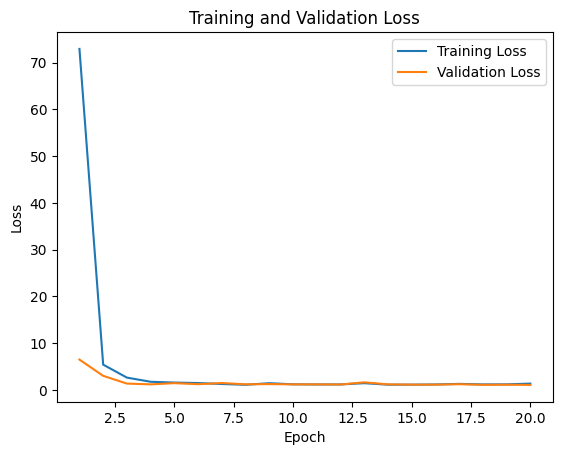

In [ ]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10)

We can observe from the above that the model nicely fits the data. Both the on the training and validation set. Hence the model is performing well.

Code task: modify the learning rate and batch_size and see the effect it has on the loss function.

In [ ]:
# Your code here
learning_rate = ... # update here
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=leanring_rate, num_epochs=20, batch_size=10)

In [ ]:
# Your code here
batch_size = ... # update here
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=batch_size)

### 2.2 Non linear regression and neural networks  - <font color='blue'>`Beginner`</font>

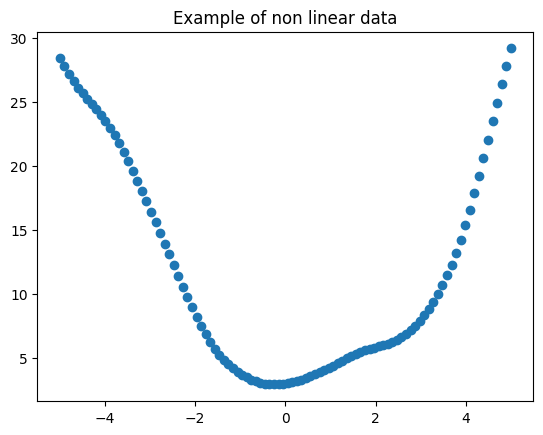

In [ ]:
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

Linear regression is a simple and powerful data inference method; however, it has limitations in capturing complex relationships. To model such complexities, we require more powerful models. For example no single line will perfectly fit the data in the above figure. Nonlinear models, such as polynomials, exponentials, and trigonometric functions, offer solutions to this problem.

Before the explosion of deep learning techniques, fitting pre-defined functions to datasets was the goto machine learning approach. Examples of classcial algorithms using this approach include support vector machines, naive Bayes, k-means clustering, among others.

In this section, we will introduce neural networks which is a the realm of deep learning techniques and recent sucess in machine learning.

#### Model representation - <font color='blue'>`Beginner`</font>


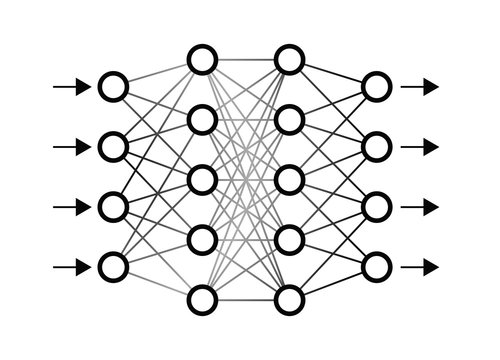

            Image of a neural network with two hidden layers.






Neural networks are a powerful class of machine learning models inspired by how the human brain functions. Unlike linear regression, which applies a single transformation to the data, neural networks process input data through a series of transformations before reaching the final predictive layer. The term 'Deep Learning' arises from the numerous transformations applied to the input data.

In the image, the circles represent nodes, and the links connecting them represent the model's parameters.

#### Activation functions - <font color='blue'>`Beginner`</font>
Activation functions are essential in neural networks. The input to every node is a linear function of all the nodes from the previous layer. Without applying an activation function, also called a non-linearity, the entire neural network, no matter how many layers it has, reduces to a simple linear model. Thus, activation functions are used to break the linearity and ensure that we build a complex non-linear function.

The equation for node \(i\) in layer \(j\) of a neural network can be expressed as follows:

$$ \text{Output}_{ij} = \text{Activation Function} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ is the output of node $i$ in layer $j$.
- $\text{Weight}_{ijk}$ is the weight connecting node $i$ in layer $j$ to node $k$ in layer $j-1$.
- $\text{Output}_{(j-1)k}$ is the output of node $k$ in layer $j-1$.
- $\text{Bias}_{ij}$ is the bias term for node $i$ in layer $j$.
- $\text{Activation Function}$ is the chosen activation function that introduces nonlinearity to the output of the neuron.



Some poplular activation functions include:

$\text{ReLU})(x) \, = \, \text{max}(0, x),$

$\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$

$\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$.

Let implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.

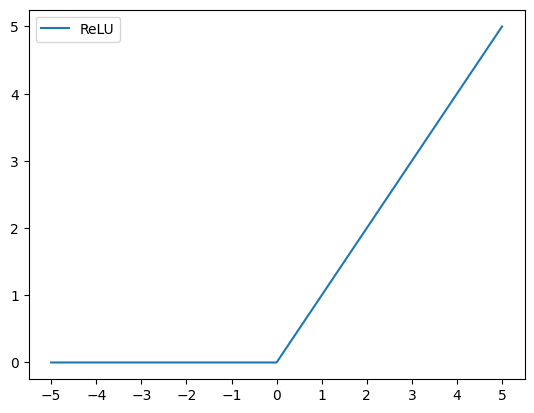

In [3]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:**

Implement and plot another activation function of your choice.


In [ ]:
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this



#### Building a simple neural network model with Jax - <font color='blue'>`Beginner`</font>

Futurnately, the are different high level modules that can be used to develop deep neural networks and we don't have implement everything from scratch. For example for jax based model we can use [haiku]( https://dm-haiku.readthedocs.io/en/latest/) and [flax](https://flax.readthedocs.io/en/latest/getting_started.html). Moreover advanced optimisation techniques can be implemented using [optax](https://optax.readthedocs.io/en/latest/). In this section we will use haiku to implement a simple 4 layer neural network.

In [ ]:
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.

class Network(hk.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

    def __call__(self, x):
        # First layer with ReLU activation
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Second layer
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Third (output) layer with sigmoid activation
        x = hk.Linear(self.output_size)(x)
        x = jax.nn.relu(x)

        return x

In order to use an haiku model we need to apply a transformation on it and then call the init function with some dummy data to initaliase the parameters.

In [ ]:
# transform and intialiase the model.
seed = 32
input_size = 4
hidden_size = 5
output_size = 1
model = Network(hidden_size, output_size)
model = hk.transform(model)  # applying the transform

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)


Now that we have the model and initial parameters, all we need is a loss function and some data then we can use the batch gradient decesnt function to train the model.

Code task: write a loss function with the following syntax for our model.
Hint: look at the previous loss function we used for linear regression.

In [ ]:
# Code
def neural_network_loss_fn(params, X, y):
  # your code here

  return


SyntaxError: ignored

Sample solution

In [ ]:
def neural_network_loss_fn(params, X, y):

  m  = model(params, X)
  loss = 0.5*jnp.mean((m-y)**2)

  return loss

#### Training a neural network model with Jax - <font color='blue'>`Beginner`</font>

<font color=red> Create some dummy data here or maybe load some real data here and give a task for the students to train the model with this data. Also they can modify the model. Also mention that they can modify the model to use highlevel modules such as an MLP layer </font>

**Group Task:**

Task that involves asking your neighbour or a group a question.

## **Classification using Jax**
In this section, we will learn how to implement a machine learning model for classfification. Classifcation is a type machine learning task where the objective of the model is learn how to classify inputs into on of several categories. For example buiding a machine learning model to classifier dogs and cats using images of dogs and cats as inputs.

### 3.1 Logistic regression - <font color='blue'>`Beginner`</font>

Linear regression aims to find a function $f$ that maps our **inputs $x$**, where $x \in \mathbb{R}^d$ to the corresponding **output/target - $y$**, where $y \in \mathbb{R}^1$ (output is a single real number). Contrary to regression, the **output/target -$y$** can only take on certain values in logistic regression. When the **target** can only take on one of two values, the algorithm is called **Binary Clasification**.

Hence the aim of Logistic regression (in this notebook logistic refers to Binary classification only) is to map **inputs $x$**, where $x \in \mathbb{R}^d$ to $y$, where $y \in \{0,1\}$.

For example, if we are building an image classifier for cats and dogs, 1 maybe used to represent the target values for cats and 0 for dogs.

#### Logits and sigmoid activation function - <font color='blue'>`Beginner`</font>
The target values for logistic regression problems are discrete values. It is not straigtfoward how to define a model function that outputs discrete values. Hence we design the model to output probabilities instead. Recall that probabilies only lie the range of values $[0,1]$, thus hence we need a function that maps the probabilities in the range $[0,1]$ to $(-∞, ∞)$. This function is called the [logit function](https://en.wikipedia.org/wiki/Logit) hence the name logistic regression.
<br>
<center>
 $$logit(p) = \ln\frac{p}{1-p},$$
</center>
where $p$ is the probability.

**Let's plot the logit function.**

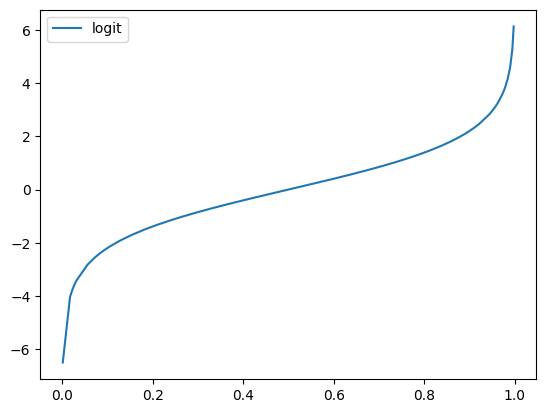

In [ ]:
def logit(p):
    # computes the logit function
    out = np.log(p/(1 - p + 1e-8)) # we add 1e-8 to just to avoid instances of division by 0
    return out

probs = np.random.uniform(0, 1, size=200)
probs = np.sort(probs)
plt.plot(probs, logit(probs), label="logit")
plt.legend(loc="best")

**Sigmoid function**

The goal of logistic regression is to predict the logit for each of our inputs but for the sake of classification, we are interested in the probabilities directly. So we need to invert the logit function to obtained the probabilities. The inverse of the logit function is the **Sigmoid** activation function. Hence in order to build a neural network for binary classification
<br>
<center>
 $$\sigma(x) = \frac{1}{1+e^{-x}}$$
</center>
<br>
<br>

**Exercise:** show that the Sigmoid function is the inverse of the logit function.

**Cross entropy loss function**

In binary classification we can only have one of two values for the targets, thus we can not use the same loss function as in previous regression example where the target output was continous. most appropriate function model for the errors in logistic regression is the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution). This leads to the following error function for logistic regression most often refered to as the cross entropy loss function
<br>
<center>
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$
</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Code task**: implement the cross entropy loss function


In [ ]:
def cross_entropy_loss(p, y):
    # you need to make sure we never have log of 0

    # your code here
    loss = .... # update me
    return loss

Run me to test your solution

In [9]:

def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Expected cross-entropy loss for the test data
  expected_loss = 0.28990924

  # Calculate the cross-entropy loss using the implemented function
  computed_loss = cross_entropy_loss(predictions, targets)
  print(computed_loss, expected_loss)

  assert np.isclose(computed_loss, expected_loss), "Test failed! Cross-entropy loss is incorrect."

  # If the assert statement does not raise an exception, the test is passed.
  print("Test passed! Cross-entropy loss is correct.")

  return

test_cross_entropy_loss()

0.28990924 0.28990924
Test passed! Cross-entropy loss is correct.


Solution

In [ ]:
def cross_entropy_loss(p, y):
    eps = 1e-15
    loss = -y*jnp.log(p+eps) - (1-y)*jnp.log(1-p+eps)
    return jnp.mean(loss)

#### Building a simple neural network for classification - <font color='blue'>`Beginner`</font>

#### Training the model - <font color='blue'>`Beginner`</font>




#### Evaluating the model - <font color='blue'>`Beginner`</font>


*   Accuracy
*   Precision
*   Recall
*   F1 score
*   Area Under the ROC Curve (AUC-ROC)
*   Confusion Matrix




**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.
def addition(x,y):
  return _

In [ ]:
# @title Run me to test your code

def test_addition(add_fn):
  assert add_fn(1,1) == 2, "Addition of 1 + 1 is incorrect"
  assert add_fn(0,1) == 1, "Addition of 0 + 1 is incorrect"
  print("Nice! Your answer looks correct.")

test_addition(addition)

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

def addition(x,y):
  return x + y

test_addition(addition)

**Group Task:**

Task that involves asking your neighbour or a group a question.

### 3.4 Subsection - <font color='purple'>`Homework`</font>

Math foundations:


**Math Task:**

[Optional math task or ask multiple choice question. E.g. the derivation of this would equal a, b or c. We could check this at the end of the prac.]


In [ ]:
selection = "a"  # @param ["a", "b", "c"]
print(f"You selected: {selection}")

correct_answer = "a"
assert selection == correct_answer, "Incorrect answer, hint ..."

print("Nice, you got the correct answer!")

Code demonstration

In [ ]:
# Code demonstration

**Code Task:**

In [ ]:
# Code to be implemented during practical
# You should prove the function signature.
def addition(x,y):
  return _

In [ ]:
# @title Run me to test your code

def test_addition(add_fn):
  assert add_fn(1,1) == 2, "Addition of 1 + 1 is incorrect"
  assert add_fn(0,1) == 1, "Addition of 0 + 1 is incorrect"
  print("Nice! Your answer looks correct.")

test_addition(addition)

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

def addition(x,y):
  return x + y

test_addition(addition)

**Group Task:**

Task that involves asking your neighbour or a group a question.

## Conclusion
**Summary:**

[Summary of the main points/takeaways from the prac.]

**Next Steps:**

[Next steps for people who have completed the prac, like optional reading (e.g. blogs, papers, courses, youtube videos). This could also link to other pracs.]

**Appendix:**

[Anything (probably math heavy stuff) we don't have space for in the main practical sections.]

**References:**

1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2023).

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />